# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [3]:
df = pd.read_csv('previsao_de_renda.csv')
df[['posse_de_imovel','posse_de_veiculo', 'renda']]

,posse_de_imovel,posse_de_veiculo,renda
0,True,False,3369.24
1,True,True,6096.14
2,True,True,5658.98
3,False,True,7246.69
4,False,False,4017.37
...,...,...,...
14995,True,True,1193.29
14996,True,True,2519.18
14997,True,True,1586.85
14998,True,False,6975.39


<Axes: xlabel='posse_de_veiculo', ylabel='renda'>

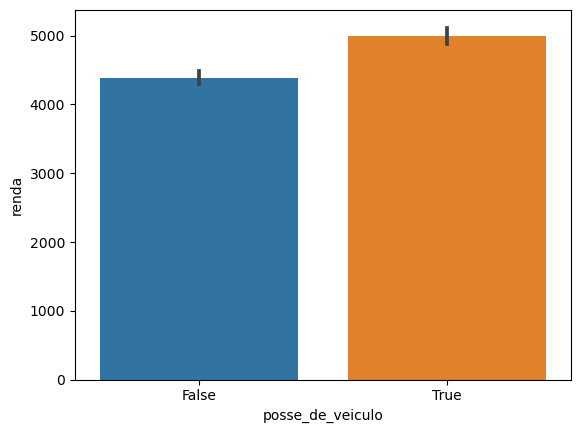

In [6]:
sns.barplot(data=df, y='renda', x='posse_de_veiculo')

<Axes: xlabel='posse_de_imovel', ylabel='renda'>

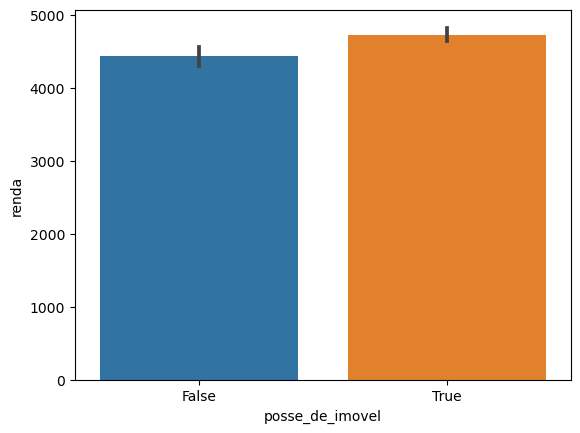

In [7]:
sns.barplot(data=df, y='renda', x='posse_de_imovel')

In [14]:
df_teste = df[['posse_de_imovel','posse_de_veiculo', 'renda']]
df_teste['posse_de_veiculo'].value_counts()

posse_de_veiculo
False    9167
True     5833
Name: count, dtype: int64

In [15]:
df_teste.groupby('posse_de_veiculo')[['renda']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

renda                                          \
                          sum         mean     min       max   median   
posse_de_veiculo                                                        
False             40247777.33  4390.506963  159.90  89918.04  3084.09   
True              29121716.86  4992.579609  187.69  67794.54  3564.43   

                                             
                          std           var  
posse_de_veiculo                             
False             4545.776180  2.066408e+07  
True              4732.823337  2.239962e+07

In [16]:
df_teste.groupby('posse_de_imovel')[['renda']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

renda                                          \
                         sum         mean     min       max   median   
posse_de_imovel                                                        
False            21771840.83  4426.970482  260.68  67794.54  3135.08   
True             47597653.36  4721.052704  159.90  89918.04  3341.20   

                                            
                         std           var  
posse_de_imovel                             
False            4569.558384  2.088086e+07  
True             4654.266817  2.166220e+07

<Axes: xlabel='posse_de_imovel', ylabel='renda'>

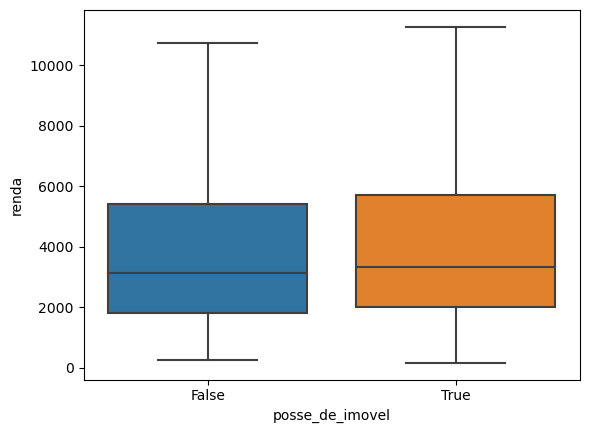

In [23]:
sns.boxplot(data=df_teste, y='renda',x='posse_de_imovel', showfliers=False)

<Axes: xlabel='posse_de_veiculo', ylabel='renda'>

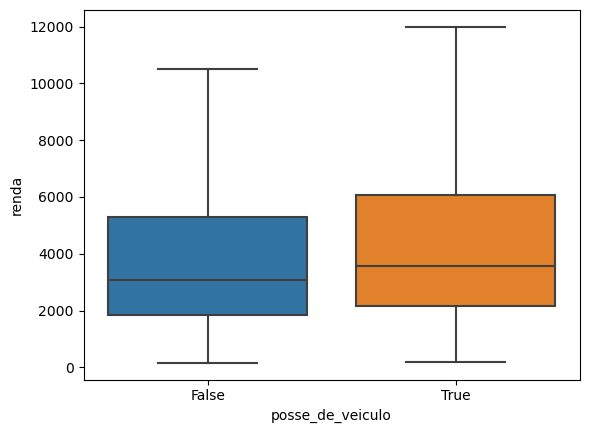

In [24]:
sns.boxplot(data=df_teste, y='renda',x='posse_de_veiculo', showfliers=False)

In [19]:
df_teste['renda'].describe()

count    15000.000000
mean      4624.632946
std       4628.571729
min        159.900000
25%       1945.740000
50%       3278.260000
75%       5642.365000
max      89918.040000
Name: renda, dtype: float64

R = Após analisar os dados, percebi que estatisticamente, a renda daqueles que possuem veículo ou imóvel se apresenta um pouco superior à renda daqueles que não possuem, não sendo uma diferença muito grande, 